#### Mineração de Processos

# GERENCIAMENTO DAS REDES DE PETRI

### As redes de Petri são um dos padrões mais comuns para expressar um modelo de processo. 
### Uma rede de Petri é um grafo bipartido direcionado, no qual os nós representam transições e lugares. 
### Os arcos estão conectando lugares a transições e transições a lugares e têm um peso associado. 
### Uma transição pode ser disparada se cada um de seus locais de entrada contiver um número de fichas (tokens) que seja pelo menos igual ao peso do arco conectando o local à transição. 
### Quando uma transição é disparada, as fichas (tokens) são removidos dos locais de entrada de acordo com o peso do arco de entrada e são adicionados aos locais de saída de acordo com o peso do arco de saída.

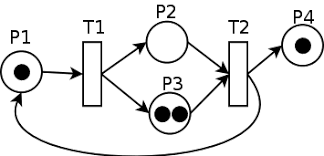

In [3]:
from IPython.display import Image
Image(filename='img_petrinet.png', width=500, height=500)

### Uma marcação é um estado na rede de Petri que associa cada local a uma série de fichas (tokens) e é exclusivamente associada a um conjunto de transições habilitadas que podem ser disparadas de acordo com a marcação.
### Os algoritmos de descoberta de processos implementados em pm4py retornam uma rede de Petri junto com uma marcação inicial e uma marcação final. Uma marcação inicial é o estado inicial de execução de um processo, e uma marcação final é um estado que deve ser alcançado no final da execução do processo.

## Importando e Exportando

### As Redes de Petri, junto com sua marcação inicial e final, podem ser importadas/exportadas do formato de arquivo PNML.
###  Importando uma Rede de Petri com a marcação inicial e final.

In [2]:
# Importando a Classe importer e o arquivo running-example.pnml
import os
from pm4py.objects.petri.importer import importer as pnml_importer
net, initial_marking, final_marking = pnml_importer.apply("running-example.pnml")

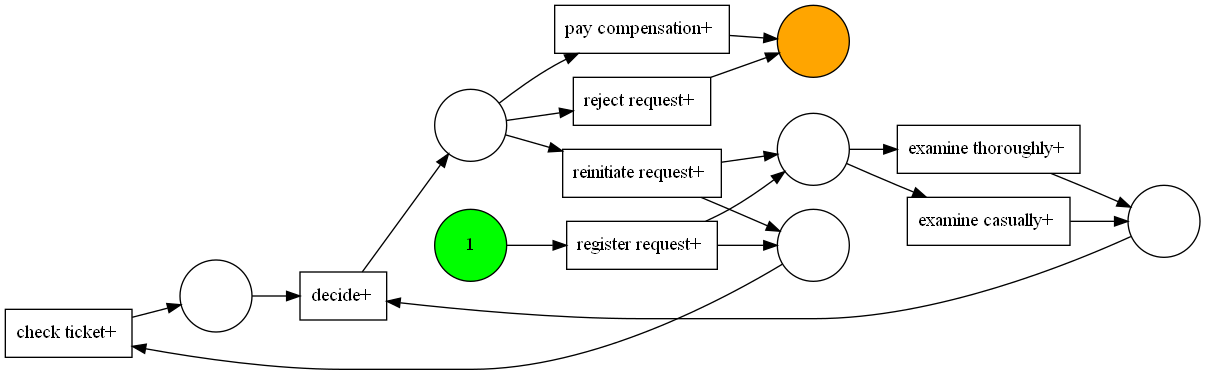

In [3]:
# Importando o visualizer
from pm4py.visualization.petrinet import visualizer as pn_visualizer
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)

In [5]:
# Exportando a marcação inicial e final.

# Importando as bibliotecas.
from pm4py.objects.petri.exporter import exporter as pnml_exporter

# Exportando a marcação inicial
pnml_exporter.apply(net, initial_marking, "petri_initial.pnml")

# Exportando a marcação final
pnml_exporter.apply(net, initial_marking, "petri_final.pnml", final_marking=final_marking)

## Propriedades da Rede de Petri


### Uma propriedade da rede é, por exemplo, a transição habilitada em uma determinada marcação. 
### Uma lista de lugares, transições ou arcos pode ser inspecionada.

In [12]:
from pm4py.objects.petri import semantics
transitions = semantics.enabled_transitions(net, initial_marking)

In [14]:
print(transitions)

{register request+ }


In [16]:
# A função print(transitions) relata que apenas a solicitação de registro de transição está habilitada na marcação inicial
# da Rede de Petri dada. 

### Obtendo todos os places (lugares), atividades (transitions) e arcos (arcs) da rede de Petri

In [17]:
places = net.places
transitions1 = net.transitions
arcs = net.arcs

In [18]:
places

{node1, node2, node3, node4, node5, node6, node7}

In [19]:
transitions1

{check ticket+ ,
 decide+ ,
 examine casually+ ,
 examine thoroughly+ ,
 pay compensation+ ,
 register request+ ,
 reinitiate request+ ,
 reject request+ }

In [20]:
arcs

{(p)node1->(t)decide+ ,
 (p)node2->(t)decide+ ,
 (p)node3->(t)check ticket+ ,
 (p)node4->(t)examine casually+ ,
 (p)node4->(t)examine thoroughly+ ,
 (p)node5->(t)pay compensation+ ,
 (p)node5->(t)reinitiate request+ ,
 (p)node5->(t)reject request+ ,
 (p)node6->(t)register request+ ,
 (t)check ticket+ ->(p)node1,
 (t)decide+ ->(p)node5,
 (t)examine casually+ ->(p)node2,
 (t)examine thoroughly+ ->(p)node2,
 (t)pay compensation+ ->(p)node7,
 (t)register request+ ->(p)node3,
 (t)register request+ ->(p)node4,
 (t)reinitiate request+ ->(p)node3,
 (t)reinitiate request+ ->(p)node4,
 (t)reject request+ ->(p)node7}

### Cada place tem um nome e um conjunto de arcos de entrada/saída (conectados na origem/destino a uma transition). 
### Cada transition tem um nome e um rótulo e um conjunto de arcos de entrada/saída (conectados na origem/destino a um local).
### Ainda, também existe as funções trans.name, trans.label, arc.target.name

In [21]:
for place in places:
 print("\nPLACE: "+place.name)
 for arc in place.in_arcs:
  print(arc.source.name, arc.source.label)


PLACE: node5
node11 decide+ 

PLACE: node6

PLACE: node3
node12 register request+ 
node8 reinitiate request+ 

PLACE: node7
node13 pay compensation+ 
node10 reject request+ 

PLACE: node4
node12 register request+ 
node8 reinitiate request+ 

PLACE: node2
node9 examine casually+ 
node15 examine thoroughly+ 

PLACE: node1
node14 check ticket+ 


## Criando uma nova Rede de Petri

In [22]:
# Importando as Classes PetriNet
from pm4py.objects.petri.petrinet import PetriNet, Marking

# Criando uma Rede de Petri vazia
# O nome do objeto Rede de Petri é new_petri_net e está armazenada na variável net.
net = PetriNet("new_petri_net")

In [24]:
# Criando 3 places com os nomes de: p1, p2, e p3. 
p1 = PetriNet.Place("p1")
p2 = PetriNet.Place("p2")
p3 = PetriNet.Place("p3")

# Estes places são adicionados a rede "new_petri_net" contido na variável net.
net.places.add(p1)
net.places.add(p2)
net.places.add(p3)

In [25]:
# Criando as transitions
# As transitions precisam receber um nome e um rótulo
t_1 = PetriNet.Transition("name_1", "label_1")
t_2 = PetriNet.Transition("name_2", "label_2")

# Adicionando as transitions a Rede de Petri
net.transitions.add(t_1)
net.transitions.add(t_2)

In [26]:
# Criando e adicionando os arcos (arcs).

# Importando pacotes.
from pm4py.objects.petri import utils

# O primeiro parâmetro especifica o ponto de começo do arco.
# O segundo parâmetro especifica o alvo final do arco.
# O último parâmetro exibe a Rede de Petri que o arco pertence.
utils.add_arc_from_to(p1, t_1, net)
utils.add_arc_from_to(t_1, p3, net)
utils.add_arc_from_to(p3, t_2, net)
utils.add_arc_from_to(t_2, p2, net)

(t)label_2->(p)p2

In [27]:
# Para completar a Rede de Petri, é necessário definir uma marcação inicial e, possivelmente, uma marcação final. 
# Para fazer isso, definimos a marcação inicial para conter 1 token (ficha) no local de origem; e a marcação final,
# para conter 1 token (ficha) no local do coletor.

# Definindo a marcação inicial
initial_marking = Marking()
# Definindo o place da marcação inicial "p1" e o número de tokens na marcação inicial.
initial_marking[p1] = 1

# Definindo a marcação final
final_marking = Marking()
# Definindo o place da marcação final "p2" e o número de tokens na marcação final.
final_marking[p2] = 1

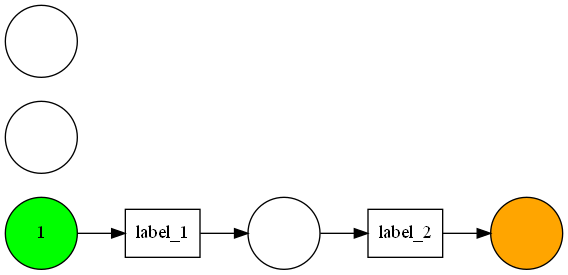

In [30]:
# O resultado da Rede de Petri pode ser visualizada e exportada.

# Exportando a Rede de Petri criada como arquivo.pnml
from pm4py.objects.petri.exporter import exporter as pnml_exporter
pnml_exporter.apply(net, initial_marking, "createdPetriNet1.pnml", final_marking=final_marking)

# Visualizando a Rede por meio do Visualizer
from pm4py.visualization.petrinet import visualizer as pn_visualizer
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)

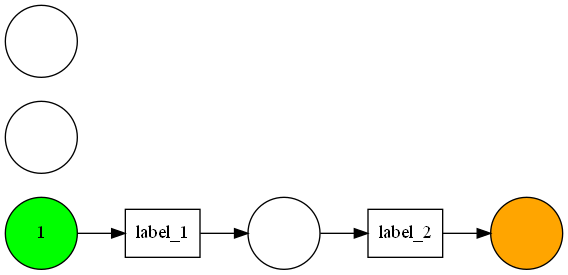

In [33]:
# Para obter um formato de saída específico, como .svg ou .png, um parâmetro de formato deve ser fornecido ao algoritmo.

from pm4py.visualization.petrinet import visualizer as pn_visualizer
parameters = {pn_visualizer.Variants.WO_DECORATION.value.Parameters.FORMAT:"png"}
gviz = pn_visualizer.apply(net, initial_marking, final_marking, parameters=parameters)
pn_visualizer.view(gviz)

from pm4py.visualization.petrinet import visualizer as pn_visualizer
parameters = {pn_visualizer.Variants.WO_DECORATION.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, initial_marking, final_marking, parameters=parameters)
pn_visualizer.save(gviz, "alpha.png")

## Decomposição Máxima

### A técnica de decomposição proposta nesta seção é útil para fins de verificação de conformidade. Na verdade, dividir o modelo geral em modelos menores pode reduzir o tamanho do espaço de estados, aumentando assim o desempenho da operação de verificação de conformidade. 

### Propomos usar a técnica de decomposição (decomposição máxima de uma rede de Petri) descrita em:
#### Van der Aalst, Wil MP. “Redes de Petri em decomposição para mineração de processos: uma abordagem genérica.” Bancos de dados distribuídos e paralelos 31.4 (2013): 471-507.

### Podemos ver um exemplo de decomposição máxima no topo da rede de Petri extraída pelo Alpha Miner no topo do registro do exemplo em execução.

### Vamos primeiro carregar o registro de exemplo em execução e aplicar o Alpha Miner.

In [41]:
import os
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.algo.discovery.alpha import algorithm as alpha_miner

log = xes_importer.apply("teste.xes")
net, im, fm = alpha_miner.apply(log)

In [42]:
# A decomposição pode ser encontrada por meio da função decompose()

from pm4py.objects.petri.decomposition import decompose

list_nets = decompose(net, im, fm)

In [43]:
list_nets

[(<pm4py.objects.petri.petrinet.PetriNet at 0x1d8f19125c8>, [], ['end:1']),
 (<pm4py.objects.petri.petrinet.PetriNet at 0x1d8f2e5f308>, [], []),
 (<pm4py.objects.petri.petrinet.PetriNet at 0x1d8f2f14308>, [], []),
 (<pm4py.objects.petri.petrinet.PetriNet at 0x1d8f2f14488>, [], []),
 (<pm4py.objects.petri.petrinet.PetriNet at 0x1d8f2f147c8>, [], []),
 (<pm4py.objects.petri.petrinet.PetriNet at 0x1d8f2f0b988>, [], []),
 (<pm4py.objects.petri.petrinet.PetriNet at 0x1d8f2efaf08>, ['start:1'], [])]

In [45]:
# Se quisermos representar cada uma das Redes de Petri, podemos usar um loop FOR:

In [44]:
from pm4py.visualization.petrinet import visualizer
gviz = []
for index, model in enumerate(list_nets):
    subnet, s_im, s_fm = model

    gviz.append(visualizer.apply(subnet, s_im, s_fm, parameters={visualizer.Variants.WO_DECORATION.value.Parameters.FORMAT: "png"}))
    visualizer.save(gviz[-1], str(index)+".png")

In [46]:
# Um log que é ajustado de acordo com o modelo original, também é ajustado (de acordo com as atividades da rede),
# para essas redes.
# Por outro lado, qualquer desvio acima desses modelos representa um desvio também no modelo original.

## Gráfico de Alcançabilidade (Reachability Graph)

#### Um gráfico de alcançabilidade é um sistema de transição que pode ser construído em qualquer Rede de Petri apresentando todas as marcações da rede.
#### O principal objetivo do gráfico de alcançabilidade é fornecer uma compreensão do espaço de estados da Rede de Petri. 
#### Normalmente, as redes de Petri que contêm muita simultaneidade têm um gráfico de alcançabilidade incrivelmente grande. 
#### O mesmo cálculo do gráfico de alcançabilidade pode ser inviável para tais modelos.

In [47]:
from pm4py.objects.petri import reachability_graph

ts = reachability_graph.construct_reachability_graph(net, im)

In [48]:
ts

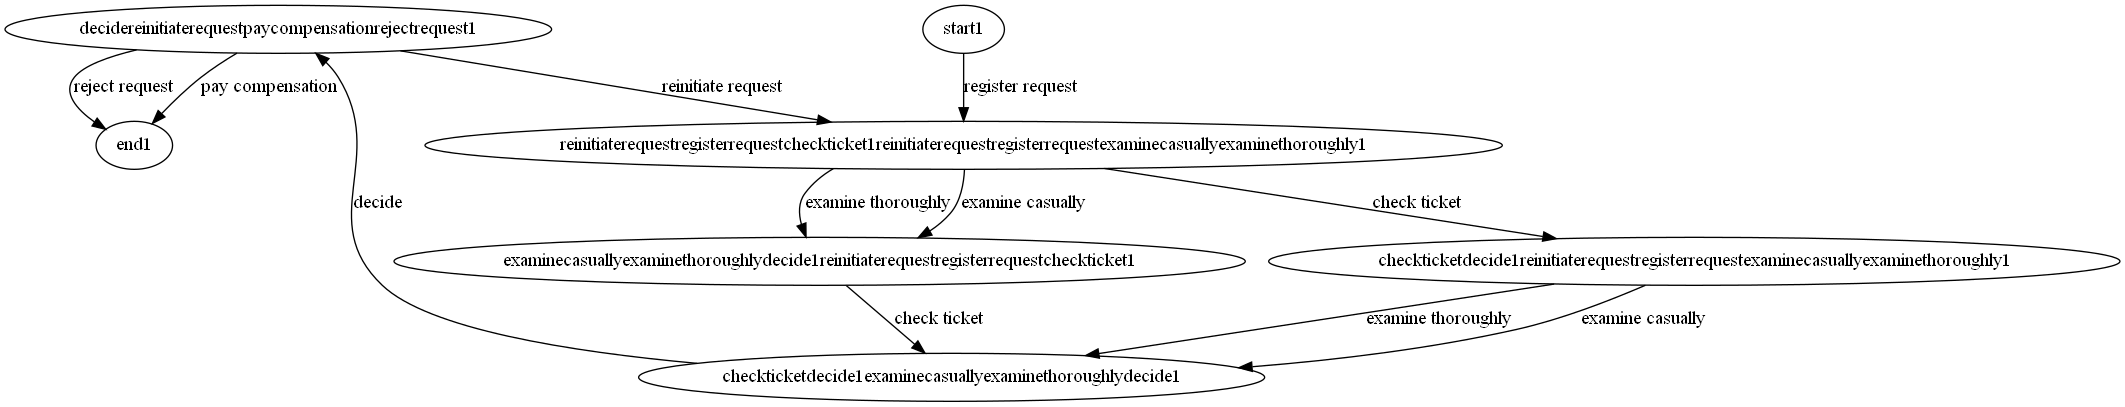

In [49]:
from pm4py.visualization.transition_system import visualizer as ts_visualizer

gviz = ts_visualizer.apply(ts, parameters={ts_visualizer.Variants.VIEW_BASED.value.Parameters.FORMAT: "png"})
ts_visualizer.view(gviz)